In [167]:
import os
from io import StringIO, BytesIO
import IPython.display
import numpy as np
import PIL.Image
from PIL import Image
from scipy.stats import truncnorm
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import imghdr
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

In [136]:
dirpath = r"\Users\brian\Documents\dsc160-final-dsc160-group18\data\albums"
thepath = r"\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"

In [137]:
def make_thumbnail(filename, imagepath, newpath):
    #print(imagepath + "\\" + filename)
    temp = imagepath + "\\" + filename
    img = Image.open(temp)
    size = 512,512
    img.thumbnail(size)
    img.save(newpath + "\\" + filename)

In [138]:
directory = imagepath = os.fsencode(r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\albums")
for file in os.listdir(directory):
    make_thumbnail(file.decode('utf-8'), dirpath, thepath)

In [213]:
import pathlib
temp = r"\Users\brian\Documents\dsc160-final-dsc160-group18\data"
data_dir = pathlib.Path(temp)
data_dir
image_count = len(list(data_dir.glob('*/*.jpg')))
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".gitkeep"])
albums = list(data_dir.glob('512albums/*'))

In [187]:
from os import listdir
dirt = r"C:\\Users\brian\Documents\dsc160-final-dsc160-group18\data\512albums"
from numpy import asarray
def load_images(path, size=(512,512)):
    temp = list()
    for filename in listdir(path):
        pixels = load_img(path + "\\" + filename, target_size=size)
        pixels = img_to_array(pixels)
        temp.append(pixels)
    return asarray(temp)

data = load_images(dirt)
filename = 'albums.npz'
savez_compressed(filename, data)

In [208]:
from numpy import load
from matplotlib import pyplot
data = load('albums.npz')
images = data['arr_0']
images.shape

(96, 512, 512, 3)

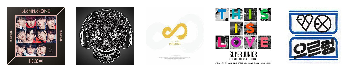

In [212]:
n_samples = 5
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(images[i].astype('uint8'))
pyplot.show()

In [224]:
images

array([[[[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [167., 142., 138.],
         [231., 200., 198.],
         [231., 200., 198.]],

        [[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [167., 142., 138.],
         [231., 200., 198.],
         [231., 200., 198.]],

        [[ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         [ 69.,  64.,  60.],
         ...,
         [243., 218., 214.],
         [179., 149., 147.],
         [179., 149., 147.]],

        ...,

        [[164., 139., 135.],
         [164., 139., 135.],
         [245., 220., 216.],
         ...,
         [ 23.,  19.,  16.],
         [ 23.,  19.,  16.],
         [ 23.,  19.,  16.]],

        [[232., 201., 199.],
         [232., 201., 199.],
         [179., 149., 147.],
         ...,
         [ 23.,  19.,  16.],
         [ 24.,  20.,  17.],
         [ 24.,  20.,  17.]],

        [[232., 201., 199.],
       

In [223]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.